# import data

In [1]:
from WindPy import *

#Wind API 使用W账户密码登录
w.start() 

#return True and then can go to next operation.
w.isconnected()

import pandas as pd

22.9.1.52437
Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
# w.wsi("123046.SZ,300587.SZ,113642.SH,603185.SH,110061.SH,600674.SH,128081.SZ,002203.SZ,113016.SH,601127.SH,128017.SZ,002597.SZ",  "close",  "2022-09-06 09:00:00",  "2022-09-09 16:28:08",  "")

In [3]:
cbond_list = ['123046.SZ','300587.SZ',
'113642.SH','603185.SH',
'110061.SH','600674.SH',
'128081.SZ','002203.SZ',
'113016.SH','601127.SH',
'128017.SZ','002597.SZ',
'113537.SH','603348.SH',
'123027.SZ','300487.SZ',
'113534.SH','603876.SH',
'113025.SH','601677.SH',
'123031.SZ','300655.SZ',
'128029.SZ','002078.SZ']

# ###############################################################
# before_trade_date = '20220908'#监测当日前一个交易日
# present_date = '20220909' #监测当日
# next_trade_date = '20220910' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220909'#监测当日前一个交易日
# present_date = '20220913' #监测当日
# next_trade_date = '20220914' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220913'#监测当日前一个交易日
# present_date = '20220914' #监测当日
# next_trade_date = '20220915' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220914'#监测当日前一个交易日
# present_date = '20220915' #监测当日
# next_trade_date = '20220916' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220915'#监测当日前一个交易日
# present_date = '20220916' #监测当日
# next_trade_date = '20220917' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220916'#监测当日前一个交易日
# present_date = '20220919' #监测当日
# next_trade_date = '20220920' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220919'#监测当日前一个交易日
# present_date = '20220920' #监测当日
# next_trade_date = '20220921' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220920'#监测当日前一个交易日
# present_date = '20220921' #监测当日
# next_trade_date = '20220922' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220921'#监测当日前一个交易日
# present_date = '20220922' #监测当日
# next_trade_date = '20220923' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220922'#监测当日前一个交易日
# present_date = '20220923' #监测当日
# next_trade_date = '20220924' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220923'#监测当日前一个交易日
# present_date = '20220926' #监测当日
# next_trade_date = '20220927' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220926'#监测当日前一个交易日
# present_date = '20220927' #监测当日
# next_trade_date = '20220928' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220927'#监测当日前一个交易日
# present_date = '20220928' #监测当日
# next_trade_date = '20220929' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220928'#监测当日前一个交易日
# present_date = '20220929' #监测当日
# next_trade_date = '20220930' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220929'#监测当日前一个交易日
# present_date = '20220930' #监测当日
# next_trade_date = '20221001' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220930'#监测当日前一个交易日
# present_date = '20221010' #监测当日
# next_trade_date = '20221011' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221010'#监测当日前一个交易日
# present_date = '20221011' #监测当日
# next_trade_date = '20221012' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20221011'#监测当日前一个交易日
# present_date = '20221012' #监测当日
# next_trade_date = '20221013' #监测当日下一个自然日
# ###############################################################

# ###############################################################
before_trade_date = '20221012'#监测当日前一个交易日
present_date = '20221013' #监测当日
next_trade_date = '20221014' #监测当日下一个自然日
# ###############################################################

In [4]:
start_date = pd.to_datetime(before_trade_date) 
end_date = pd.to_datetime(next_trade_date)

cbond_price = pd.DataFrame([])
for code in cbond_list:
    price_df = w.wsi(code, "close", start_date, end_date,usedf=True)[1]   #只要了收盘价
    price_df.columns = [code]
    cbond_price = pd.concat([cbond_price,price_df],axis=1)
cbond_price = cbond_price.ffill()    
# cbond_rtn = cbond_price[cbond_price.index.time!=time(15,0,0)]
# cbond_price = cbond_price.loc['2022-09-09 15:00:00':] #从前一个交易日的收盘价开始截取
cbond_price_begin_time = before_trade_date[:4]+'-' + \
                    before_trade_date[4:6]+'-' + \
                    before_trade_date[6:8]+' 15:00:00'
cbond_price = cbond_price.loc[cbond_price_begin_time:]
cbond_price

,123046.SZ,300587.SZ,113642.SH,603185.SH,110061.SH,600674.SH,128081.SZ,002203.SZ,113016.SH,601127.SH,...,123027.SZ,300487.SZ,113534.SH,603876.SH,113025.SH,601677.SH,123031.SZ,300655.SZ,128029.SZ,002078.SZ
2022-10-12 15:00:00,339.966,10.88,137.994,141.58,142.441,12.54,128.450,11.85,321.150,52.49,...,377.000,71.92,432.851,59.95,290.160,18.79,322.679,14.68,150.400,11.72
2022-10-13 09:30:00,337.537,10.80,137.274,140.53,142.186,12.48,128.227,11.78,321.517,51.60,...,376.982,71.86,437.567,60.01,294.656,19.02,323.122,14.62,150.194,11.65
2022-10-13 09:31:00,338.238,10.80,138.169,141.06,142.212,12.51,128.725,11.84,322.700,52.46,...,379.977,72.57,443.650,60.84,294.249,19.15,324.291,14.75,150.179,11.67
2022-10-13 09:32:00,340.197,10.86,138.741,141.13,141.852,12.46,128.700,11.81,322.442,52.21,...,383.728,73.19,450.100,61.35,295.530,19.18,323.946,14.73,150.050,11.64
2022-10-13 09:33:00,340.530,10.87,139.632,142.47,141.883,12.46,128.827,11.81,323.133,52.34,...,384.492,73.43,454.263,61.40,296.363,19.16,326.000,14.78,149.640,11.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-13 14:56:00,352.380,10.80,135.572,139.02,141.861,12.49,127.852,11.78,316.500,51.93,...,382.600,73.26,430.769,58.67,295.203,19.43,321.701,14.60,149.700,11.70
2022-10-13 14:57:00,352.378,10.81,135.701,139.12,141.899,12.49,127.852,11.78,316.499,51.92,...,383.498,73.26,430.398,58.67,295.253,19.44,321.700,14.60,149.700,11.71
2022-10-13 14:58:00,352.378,10.81,135.713,139.12,141.923,12.49,127.852,11.78,316.450,51.92,...,383.498,73.26,430.249,58.67,295.380,19.44,321.700,14.60,149.700,11.71
2022-10-13 14:59:00,352.378,10.81,135.690,139.12,141.800,12.49,127.852,11.78,316.210,51.92,...,383.498,73.26,429.636,58.67,295.018,19.44,321.700,14.60,149.700,11.71


In [5]:
# assert False

# stock pre status

In [6]:
df_stk_pre_return = w.wss("300587.SZ,603185.SH,600674.SH,002203.SZ,601127.SH,002597.SZ,603348.SH,300487.SZ,603876.SH,601677.SH,300655.SZ,002078.SZ",
 "pct_chg", f"tradeDate={before_trade_date};cycle=D;",usedf=True)[1]
df_stk_pre_return

,PCT_CHG
300587.SZ,2.932829
603185.SH,1.717077
600674.SH,1.951220
002203.SZ,1.629503
601127.SH,4.833233
002597.SZ,1.413333
603348.SH,6.832034
300487.SZ,-0.111111
603876.SH,3.362069
601677.SH,2.733734


In [7]:
df_bond_pre_return = w.wss("123046.SZ,113642.SH,110061.SH,128081.SZ,113016.SH,128017.SZ,113537.SH,123027.SZ,113534.SH,113025.SH,123031.SZ,128029.SZ",
 "pct_chg", f"tradeDate={before_trade_date};cycle=D;",usedf=True)[1]
df_bond_pre_return

,PCT_CHG
123046.SZ,1.621321
113642.SH,1.704734
110061.SH,2.034369
128081.SZ,1.997872
113016.SH,-1.637085
128017.SZ,3.488781
113537.SH,9.540956
123027.SZ,0.533870
113534.SH,7.839625
113025.SH,5.919845


In [8]:
before_trade_date_trade_status = before_trade_date[:4] +'-'+ before_trade_date[4:6] +'-'+ before_trade_date[6:]
# present_date_trade_status = present_date[:4] +'-'+ present_date[4:6] +'-'+ present_date[6:]
df_stk_pre_trade_status = w.wsd("300587.SZ,603185.SH,600674.SH,002203.SZ,601127.SH,002597.SZ,603348.SH,300487.SZ,603876.SH,601677.SH,300655.SZ,002078.SZ", 
"trade_status", f"{before_trade_date_trade_status}", f"{before_trade_date_trade_status}", "",usedf=True)[1]
df_stk_pre_trade_status

,TRADE_STATUS
300587.SZ,交易
603185.SH,交易
600674.SH,交易
002203.SZ,交易
601127.SH,交易
002597.SZ,交易
603348.SH,交易
300487.SZ,交易
603876.SH,交易
601677.SH,交易


In [9]:
# assert False

# bond-stock pair

In [245]:
# cbond_pair = ['123046.SZ','300587.SZ']
# open_threshold = 0.015
# close_threshold = 0
# convert_price = 3.94

# cbond_pair = ['113642.SH','603185.SH']  #后面筛选的结果，这组也在里面
# open_threshold = 0.023
# close_threshold = 0
# convert_price = 102.4

# cbond_pair = ['110061.SH','600674.SH']
# open_threshold = 0.006
# close_threshold = 0
# convert_price = 8.8

# cbond_pair = ['128081.SZ','002203.SZ']
# open_threshold = 0.012
# close_threshold = 0.002
# convert_price = 9.62

# cbond_pair = ['113016.SH','601127.SH']
# open_threshold = 0.017
# close_threshold = 0.003
# convert_price = 20.17

# cbond_pair = ['128017.SZ','002597.SZ']
# open_threshold = 0.012
# close_threshold = 0
# convert_price = 21.33

# $$$$$$$$$$$$$$$$$$$$$$$$以下是新增的对子$$$$$$$$$$$$$$$$$$$$$$$$

cbond_pair = ['113537.SH','603348.SH',]
open_threshold = 0.027
close_threshold = 0.002
convert_price = 19.13

# cbond_pair = ['123027.SZ','300487.SZ',]
# open_threshold = 0.022
# close_threshold = 0
# convert_price = 19.07

# cbond_pair = ['113534.SH','603876.SH',]
# open_threshold = 0.019
# close_threshold = 0.002
# convert_price = 14.98

# cbond_pair = ['113025.SH','601677.SH',]
# open_threshold = 0.018
# close_threshold = 0
# convert_price = 7.66

# cbond_pair = ['123031.SZ','300655.SZ',]   #这个被操纵了，每日总结的时候剔除掉
# open_threshold = 0.019
# close_threshold = 0
# convert_price = 6.25

# cbond_pair = ['128029.SZ','002078.SZ']
# open_threshold = 0.013
# close_threshold = 0.002
# convert_price = 8.25

In [246]:
# df_signal

# clip price series

In [247]:
#从前一个交易日的收盘价开始截取
# cbond_pair_price = cbond_price[[cbond_pair[0],cbond_pair[1]]].loc['2022-09-08 15:00:00':]
cbond_pair_price = cbond_price[[cbond_pair[0],cbond_pair[1]]]

In [248]:
cbond_pair_price.head()

,113537.SH,603348.SH
2022-10-12 15:00:00,433.803,75.37
2022-10-13 09:30:00,449.387,77.28
2022-10-13 09:31:00,460.870,77.96
2022-10-13 09:32:00,451.512,78.30
2022-10-13 09:33:00,449.000,78.49


In [249]:
cbond_return = pd.DataFrame([])

cbond_preclose = cbond_pair_price.iloc[0,0] # 初始时刻的bond前收盘价
stock_preclose = cbond_pair_price.iloc[0,1] # 初始时刻的stock前收盘价

for index,row in cbond_pair_price.iterrows():
    
    cbond_return.loc[index,cbond_pair[0]] = row[cbond_pair[0]]/cbond_preclose - 1 # 算日内的return
    cbond_return.loc[index,cbond_pair[1]] = row[cbond_pair[1]]/stock_preclose - 1

    if index.time()==time(15,0,0):  #算完日内return，迭代到今日价格的最后一个time bar的时候，将其设为前收盘价
        cbond_preclose = row[cbond_pair[0]]    # 日内return指标用 现价/昨日收盘价 计算
        stock_preclose = row[cbond_pair[1]]
        
# 检查df是否有空值
cbond_return.isnull().sum(axis=0)  # 按列统计
cbond_return.isnull().sum(axis=1) # 按行统计
cbond_return.isnull().sum(axis=1).sum() # 统计整张表

0

In [250]:
pd.set_option('display.max_rows', None)
cbond_return['diff'] = cbond_return[cbond_pair[0]] - cbond_return[cbond_pair[1]]
cbond_return.head()

,113537.SH,603348.SH,diff
2022-10-12 15:00:00,0.000000,0.000000,0.000000
2022-10-13 09:30:00,0.035924,0.025342,0.010582
2022-10-13 09:31:00,0.062395,0.034364,0.028031
2022-10-13 09:32:00,0.040823,0.038875,0.001948
2022-10-13 09:33:00,0.035032,0.041396,-0.006364


# signal calculate

In [251]:
################################################################################################
stk_pre_return = df_stk_pre_return.loc[cbond_pair[1]].values[0]
bond_pre_return = df_bond_pre_return.loc[cbond_pair[0]].values[0]
pre_diff = bond_pre_return - stk_pre_return
stk_pre_trade_status = df_stk_pre_trade_status.loc[cbond_pair[1]].values[0]
print(stk_pre_trade_status)
print('pre diff:',pre_diff)
# if abs(stk_pre_return) > 10 or stk_pre_trade_status!='交易':
if abs(pre_diff) > 5 or stk_pre_trade_status!='交易':
    # 如果前一天股票的跌幅小于-10，则今日不做操作
    intraday_open_times = 1
else:
    intraday_open_times = 0
################################################################################################    
# intraday_open_times = 0
max_open = 1

pos_open_flag = 0
neg_open_flag = 0
cbond_position = pd.DataFrame([])
cbond_position.index = cbond_return.index
for index,row in cbond_return.iterrows():

    if row['diff'] >= open_threshold and pos_open_flag==0 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff落在A区间，且无仓位，正开
            pos_open_flag = 1
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag = 0
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= open_threshold and pos_open_flag==0 and neg_open_flag==1:
        if intraday_open_times < max_open:
            #diff落在A区间，且有负仓，平仓再正开
            pos_open_flag=1
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
            print('reverse open +1')
            intraday_open_times += 1
        else:
            pos_open_flag = 0
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= open_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff落在A区间，且有正仓，keep
        pos_open_flag=1
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

    if row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在B区间，且有正仓，keep
        pos_open_flag=1
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在B区间，且有负仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    elif row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在B区间，且无仓，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    
    if row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在C区间，且有正仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在C区间，且有负仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    elif row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在C区间，且无仓位，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    
    if row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在D区间，且有负仓，keep
        pos_open_flag=0
        neg_open_flag=1
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag

    elif row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在D区间，且有正仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在D区间，且无仓位，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

    if row['diff'] <= -1*open_threshold and pos_open_flag==0 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff 落在E区间，且无仓位，反开
            pos_open_flag=0
            neg_open_flag=1
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag=0
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
    elif row['diff'] <= -1*open_threshold and pos_open_flag==1 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff 落在E区间，且有正仓，平仓反开
            pos_open_flag=0
            neg_open_flag=1
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag=0
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
    elif row['diff'] <= -1*open_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在E区间，且有负仓，keep
        pos_open_flag=0
        neg_open_flag=1
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag

    if index.time()==time(15,0,0): # 每日收盘时必须平仓（时间止损信号）
    # if index.time()==time(14,59,0): # 每日收盘时必须平仓（时间止损信号）
        intraday_open_times = 0 # 下一天开盘前，把当日记录下来的开仓次数清零
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

交易
pre diff: 2.7089223498283923


In [252]:
cbond_pair_price.head()

,113537.SH,603348.SH
2022-10-12 15:00:00,433.803,75.37
2022-10-13 09:30:00,449.387,77.28
2022-10-13 09:31:00,460.870,77.96
2022-10-13 09:32:00,451.512,78.30
2022-10-13 09:33:00,449.000,78.49


In [253]:
df_signal = pd.concat([cbond_pair_price,cbond_return,cbond_position],axis=1)
df_signal.columns = ['bond_price','stock_price','bond_rtn','stock_rtn','diff','bond_pos','stock_pos']
print('open threshold',open_threshold,'close threshold',close_threshold)
# df_signal.to_csv('tmp_signal.csv')
df_signal

open threshold 0.027 close threshold 0.002


,bond_price,stock_price,bond_rtn,stock_rtn,diff,bond_pos,stock_pos
2022-10-12 15:00:00,433.803,75.37,0.000000,0.000000,0.000000,0.0,0.0
2022-10-13 09:30:00,449.387,77.28,0.035924,0.025342,0.010582,0.0,0.0
2022-10-13 09:31:00,460.870,77.96,0.062395,0.034364,0.028031,-1.0,1.0
2022-10-13 09:32:00,451.512,78.30,0.040823,0.038875,0.001948,0.0,0.0
2022-10-13 09:33:00,449.000,78.49,0.035032,0.041396,-0.006364,0.0,0.0
2022-10-13 09:34:00,450.859,78.61,0.039317,0.042988,-0.003671,0.0,0.0
2022-10-13 09:35:00,453.703,79.83,0.045873,0.059175,-0.013301,0.0,0.0
2022-10-13 09:36:00,453.111,80.29,0.044509,0.065278,-0.020769,0.0,0.0
2022-10-13 09:37:00,454.488,80.78,0.047683,0.071779,-0.024096,0.0,0.0
2022-10-13 09:38:00,457.600,81.40,0.054857,0.080005,-0.025149,0.0,0.0


# backtest

In [254]:
# 用来记录交易流水的表格,一边遍历df_signal，一边填入内容到流水表格里

import numpy as np
cols = ['balance','signal','bond price','stock price','bond hold','stock hold','commission','tax','reverse open','diff','asset value']
df_trade = pd.DataFrame(
    data = [[0,np.nan,np.nan,np.nan,0,0,0,0,np.nan,np.nan,0]],
    columns=cols
    ) 

balance_last = 0 # 现金账户初始余额

bond_hold = 0 # 债券持有数量
stock_hold = 0 # 股票持有数量


commission_rate = 2/10000 + 0 # 佣金买卖万二 + 交易滑点
# commission_rate = 2/10000 + 0.5/1000 # 佣金买卖万二 + 交易滑点
# commission_rate = 2/10000 + 1/1000 # 佣金买卖万二 + 交易滑点

tax_rate = 1/1000 # 卖股票才收印花税千一

# commission_rate = 0/10000 # 佣金买卖万二
# tax_rate = 0/1000 #

for i in range(len(df_signal)-1):
    if df_signal.index[i].time() == time(15,0,0):
    # if df_signal.index[i].time() == time(14,59,0):
        # 修改stock volume 每天固定一个stock volume 应该用债的前收盘价/股票的前收盘价
        stock_volume = df_signal['bond_price'][i]/df_signal['stock_price'][i]

    if df_signal.values[i][-1] != df_signal.values[i+1][-1]:

        index = df_signal.index[i+1]        
        diff = df_signal.values[i+1][-3] #diff在df_signal中的倒数第三列
        
    # df_signal的columns
    # ['bond_price','stock_price','bond_rtn','stock_rtn','diff','bond_pos','stock_pos']
        signal = str(int(df_signal.values[i+1][-2]))+str(int(df_signal.values[i+1][-1]))
        
        bond_price = df_signal.values[i+1][0] 

        stock_price = df_signal.values[i+1][1]

        # stock_volume =  bond_price/stock_price # 修改stock volume 每天固定一个stock volume应该用债的前收盘价/股票的前收盘价

        commission = (bond_price + stock_price * stock_volume) * commission_rate

        reverse_open = False #表明这笔交易，是否包含平仓后再反向开仓的操作

        if signal == '00' and stock_hold == stock_volume: #有股票持仓并且需要卖出平仓时，有印花税
            tax = stock_price * tax_rate * stock_volume
        else:
            tax = 0

        if signal == '00':
            balance_last += bond_hold*bond_price
            balance_last += stock_hold*stock_price
            
            bond_hold = 0
            stock_hold = 0
            

        if signal == '1-1':
            '''
            加一个检测之前持仓的模块,如果之前因为-11的信号有持仓,需要先平掉(即买债卖股票),同时再反向开仓
            '''
            reverse_flag = False
            if bond_hold == -1 and stock_hold == 1*stock_volume:
                bond_hold = 0
                stock_hold = 0
                balance_last -= bond_price 
                balance_last += stock_price * stock_volume
                commission *= 2 # 因为平掉之后再反向开仓，手续费double
                tax = stock_price * tax_rate * stock_volume # 卖股票要收印花税
                reverse_flag = True
                reverse_open = True

            bond_hold += 1
            stock_hold += (-1 * stock_volume)
            # stock_hold += stock_volume
            balance_last -= bond_price
            balance_last += stock_price * stock_volume
            
            if reverse_flag:
                tax *= 2 #平仓然后反向开仓的时候 已经计算过tax了，直接double
            else:
                tax = stock_price * tax_rate * stock_volume # 卖股票要收印花税

        if signal == '-11':
            '''
            加一个检测之前持仓的模块,如果之前因为1-1的信号有持仓,需要先平掉(卖债买股票),同时再反向开仓
            '''
            if bond_hold == 1 and stock_hold == -1*stock_volume:
                bond_hold = 0
                stock_hold = 0
                balance_last += bond_price
                balance_last -= stock_price * stock_volume
                commission *= 2 # 因为平掉之后再反向开仓，手续费double
                                # 买股票无印花税
                reverse_open = True
            bond_hold += -1
            stock_hold += (1 * stock_volume)
            # stock_hold += stock_volume
            balance_last += bond_price
            balance_last -= stock_price * stock_volume
        
        balance_last = balance_last - commission - tax
        balance = balance_last
        asset_value = bond_price*bond_hold + stock_price*stock_hold
        line = [balance,signal,bond_price,stock_price,bond_hold,stock_hold,commission,tax,reverse_open,diff,asset_value]
        # df_trade.loc[index,['balance','asset','signal','bond price','stock price','commission','tax']] = line
        # df_trade.loc[index,cols] = [0,0,np.nan,np.nan,np.nan,0,0,0,0]
        df_trade.loc[index,cols] = line

df_trade.rename(columns={'balance':'cash'},inplace=True)       
df_trade['net value'] = df_trade['cash'] + df_trade['asset value']

In [255]:
df_trade

,cash,signal,bond price,stock price,bond hold,stock hold,commission,tax,reverse open,diff,asset value,net value
0,0.000000,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
2022-10-13 09:31:00,11.977962,-11,460.870,77.96,-1.0,5.755645,0.181916,0.000000,False,0.028031,-12.159878,-0.181916
2022-10-13 09:32:00,10.501901,00,451.512,78.30,0.0,0.000000,0.180436,0.450667,False,0.001948,0.000000,10.501901


# output to csv

In [256]:
excel_file_name = './daily_track/'+ present_date+'/' + cbond_pair[0] + '@' + cbond_pair[1] + '.csv'

excel_file_name

df_to_excel = df_trade
df_to_excel['open/close'] = [str(open_threshold)+','+str(close_threshold)]*len(df_to_excel)
df_to_excel['pair'] = [cbond_pair[0] + '@' + cbond_pair[1]]*len(df_to_excel)
df_to_excel = df_to_excel[['pair','cash', 'signal', 'bond price', 'stock price', 'bond hold',
                                            'stock hold', 'commission', 'tax', 'reverse open', 'diff',
                                            'asset value', 'net value', 'open/close']]
df_to_excel.to_csv(excel_file_name,)

In [257]:
present_date

'20221013'

# conclusion

In [258]:
# import os
# single_trade_files = os.listdir('./daily_track'+'/'+present_date)

# df_trade_conclusion = pd.DataFrame([])
# for file in single_trade_files:
#     if file == 'diff':
#         continue
#     if file == '.DS_Store' or file.split('.')[1] == 'xlsx':
#         continue
#     tmp_path = './daily_track'+'/'+present_date+'/'+file
#     df_tmp = pd.read_csv(tmp_path,index_col=0)
#     tmp_col = list(df_tmp.columns)
#     df_tmp_head = pd.DataFrame(data=[tmp_col],columns=tmp_col)
#     df_trade_conclusion = df_trade_conclusion.append(df_tmp_head)
#     df_trade_conclusion = df_trade_conclusion.append(df_tmp)
# df_trade_conclusion.columns
# df_trade_conclusion = df_trade_conclusion[['pair','cash', 'signal', 'bond price', 'stock price', 'bond hold',
#                                             'stock hold', 'commission', 'tax', 'reverse open', 'diff',
#                                             'asset value', 'net value', 'open/close']]
# df_trade_conclusion
# tmp_path = './daily_track'+'/'+present_date+'/'+f'{present_date}_conclusion.csv'

# df_trade_conclusion.to_csv(tmp_path)                                            

# intraday signal

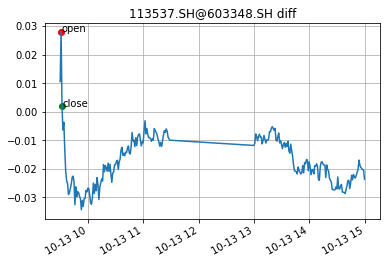

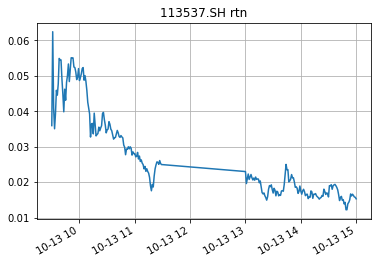

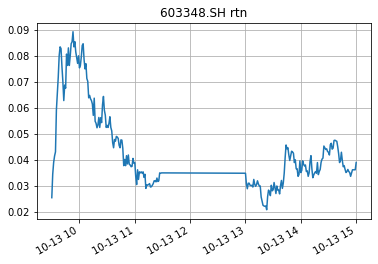

In [259]:
import matplotlib.pyplot as plt

signal_plot_begin_time = present_date[:4]+'-' + \
                         present_date[4:6]+'-' + \
                         present_date[6:8]+' 09:30:00'
df_signal['diff'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+'@'+cbond_pair[1]+' diff',grid=True)

#如果当日有开平仓记录，在图上画出开平仓时刻的标注
if len(df_trade) == 3:
    open_tick = df_trade.index.to_list()[1]
    open_diff = df_trade['diff'].to_list()[1]
    close_tick = df_trade.index.to_list()[2]
    close_diff =  df_trade['diff'].to_list()[2]
    plt.text(open_tick,open_diff,'open')
    plt.text(close_tick,close_diff,'close')
    plt.scatter([open_tick],[open_diff],color='r')

    tmp_nv = df_trade['net value'].to_list()[2]
    if tmp_nv > 0: 
        close_color = 'g' #当天赚钱的话，平仓点位标记为绿色
    else:
        close_color = 'orange' #当天亏钱的话，平仓点位标记为橙色
    plt.scatter([close_tick],[close_diff],color=close_color)
fig_file_name = './daily_track/'+ present_date+'/'+'diff/' + cbond_pair[0] + '@' + cbond_pair[1] + '.png'
plt.savefig(fig_file_name)

plt.show()
df_signal['bond_rtn'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+' rtn',grid=True)
plt.show()
df_signal['stock_rtn'].loc[signal_plot_begin_time:].plot(title=cbond_pair[1]+' rtn',grid=True)
plt.show()

<AxesSubplot:title={'center':'113537.SH@603348.SH premium rate'}>

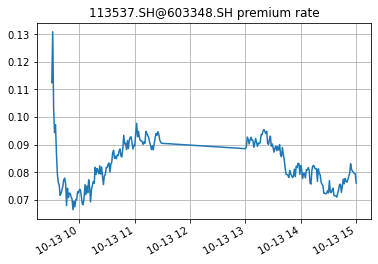

In [260]:
df_tmp = 100/convert_price*df_signal['stock_price']
df_signal['premium rate'] = (df_signal['bond_price'] - df_tmp)/df_tmp
df_signal['premium rate'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+'@'+cbond_pair[1]+' premium rate',grid=True)


In [261]:
df_signal

,bond_price,stock_price,bond_rtn,stock_rtn,diff,bond_pos,stock_pos,premium rate
2022-10-12 15:00:00,433.803,75.37,0.000000,0.000000,0.000000,0.0,0.0,0.101055
2022-10-13 09:30:00,449.387,77.28,0.035924,0.025342,0.010582,0.0,0.0,0.112419
2022-10-13 09:31:00,460.870,77.96,0.062395,0.034364,0.028031,-1.0,1.0,0.130893
2022-10-13 09:32:00,451.512,78.30,0.040823,0.038875,0.001948,0.0,0.0,0.103119
2022-10-13 09:33:00,449.000,78.49,0.035032,0.041396,-0.006364,0.0,0.0,0.094327
2022-10-13 09:34:00,450.859,78.61,0.039317,0.042988,-0.003671,0.0,0.0,0.097180
2022-10-13 09:35:00,453.703,79.83,0.045873,0.059175,-0.013301,0.0,0.0,0.087228
2022-10-13 09:36:00,453.111,80.29,0.044509,0.065278,-0.020769,0.0,0.0,0.079588
2022-10-13 09:37:00,454.488,80.78,0.047683,0.071779,-0.024096,0.0,0.0,0.076301
2022-10-13 09:38:00,457.600,81.40,0.054857,0.080005,-0.025149,0.0,0.0,0.075416


In [262]:
# 到期时间很短，且价内50%的时候，转债近似等价于正股
def cal_premium_rate(bond_price,stock_price,convert_price):
    tmp = 100/convert_price*stock_price
    res = (bond_price - tmp)/tmp
    return res
cal_premium_rate(200,140,70)

0.0